<a href="https://colab.research.google.com/github/daviafs/minicurso_python/blob/master/Minicurso_de_Python_analise_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vendo um pouco de Pandas

Mais algums detalhes podem ser vistos no [notebook](https://nbviewer.jupyter.org/github/mvinoba/notebooks-for-binder/blob/master/postagem.ipynb) usado como base para esse material.

Pandas é uma biblioteca Python que fornece ferramentas de análise de dados e estruturas de dados de alta performance e fáceis de usar. Por ser a principal e mais completa biblioteca para estes objetivos, pandas é fundamental para análise de dados com Python.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Existem dois tipos principais de estruturas de dados no pandas: **Series** e **DataFrame**.

In [0]:
from pandas import Series, DataFrame

## Series 

Uma Series é como um array unidimensional, uma lista de valores. Toda Series possui um índice, o `index`, que dá rótulos a cada elemento da lista. Abaixo criamos uma Series `notas`, o `index` desta Series é a coluna à esquerda, que vai de 0 a 4 neste caso, que o pandas criou automaticamente, já que não especificamos uma lista de rótulos.

In [0]:
notas = pd.Series([2,7,5,10,6])
notas

0     2
1     7
2     5
3    10
4     6
dtype: int64

Já podemos aqui verificar os atributos da nossa Series, comecemos pelos valores e o índice, os dois atributos *fundamentais* nesta estrutura:

In [0]:
print(notas.values)
print(notas.index)

[ 2  7  5 10  6]
RangeIndex(start=0, stop=5, step=1)


Como ao criar a Series não demos um índice específico o pandas usou os inteiros positivos crescentes como padrão. Pode ser conveniente atribuirmos um índice diferente do padrão, supondo que essas sejam notas de uma turma, poderíamos atribuir nomes ao index:



In [0]:
notas = pd.Series([2,7,5,10,6], index=["Wilfred", "Abbie", "Harry", "Julia", "Carrie"])
notas

Wilfred     2
Abbie       7
Harry       5
Julia      10
Carrie      6
dtype: int64

O index nos ajuda para referenciar um determinado valor, ele nos permite acessar os valores pelo seu rótulo:



In [0]:
notas["Julia"]


10

Outra facilidade proporcionada pela estrutura são seus métodos que fornecem informações estatísticas sobre os valores, como **média** `.mean()` e **desvio padrão** `.std()`. Encorajo o leitor(a) a investigar e verificar alguns dos métodos e atributos da estrutura usando o `TAB` para auto-completação na shell do Python, ou simplesmente checar a completíssima [documentação oficial](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html#pandas.Series) deste objeto.

In [0]:
print("Média:", notas.mean())
print("Desvio padrão:", notas.std())

Média: 6.0
Desvio padrão: 2.9154759474226504


Geralmente para resumir brevemente as estatísticas dos dados se usa o `.describe()`

In [0]:
notas.describe()

count     5.000000
mean      6.000000
std       2.915476
min       2.000000
25%       5.000000
50%       6.000000
75%       7.000000
max      10.000000
dtype: float64

A estrutura é flexível o suficiente pra aplicarmos algumas expressões matemáticas e funções matemáticas do numpy diretamente:

In [0]:
notas**2


Wilfred      4
Abbie       49
Harry       25
Julia      100
Carrie      36
dtype: int64

In [0]:
[aluno for aluno in notas.index if notas[aluno] >= 7]

['Abbie', 'Julia']

In [0]:
'Julia' in notas.index

True

In [0]:
0 in notas.values

False

## DataFrame

Já um DataFrame é uma estrutura bidimensional de dados, como uma planilha. Abaixo criaremos um DataFrame que possui valores de diferentes tipos, usando um dicionário como entrada dos dados:



In [0]:
df = pd.DataFrame({'Aluno' : ["Wilfred", "Abbie", "Harry", "Julia", "Carrie"],
                   'Faltas' : [3,4,2,1,4],
                   'Prova' : [2,7,5,10,6],
                   'Seminário': [8.5,7.5,9.0,7.5,8.0]})
df

,Aluno,Faltas,Prova,Seminário
0,Wilfred,3,2,8.5
1,Abbie,4,7,7.5
2,Harry,2,5,9.0
3,Julia,1,10,7.5
4,Carrie,4,6,8.0


Os tipos de dados que compõe as colunas podem ser verificados por um método próprio:



In [0]:
df.dtypes

É possível acessar a lista de colunas de forma bem intuitiva:



In [0]:
df.columns

Os nomes das colunas podem ser usadas pra acessar seus valores:



In [0]:
df["Seminário"]

Para DataFrames, `.describe()` também é uma boa forma de verificar resumidamente a disposição estatística dos dados numéricos:

In [0]:
df.describe()

Outra tarefa comum aplicada em DataFrames é ordená-los por determinada coluna:

In [0]:
df.sort_values(by="Seminário")

,Aluno,Faltas,Prova,Seminário
1,Abbie,4,7,7.5
3,Julia,1,10,7.5
4,Carrie,4,6,8.0
0,Wilfred,3,2,8.5
2,Harry,2,5,9.0


Muitas vezes é necessário selecionarmos valores específicos de um DataFrame, seja uma linha ou uma célula específica, e isso pode ser feito de diversas formas. A documentação oficial contém [vasta informação](https://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing) para esse tipo de tarefa, aqui nos concentraremos nas formas mais comuns de selecionarmos dados.


In [0]:
df.loc[3]

Aluno        Julia
Faltas           1
Prova           10
Seminário      7.5
Name: 3, dtype: object

Para selecionar de acordo com critérios condicionais, se usa o que se chama de **Boolean Indexing**.

In [0]:
df[df["Seminário"] > 8.0]

Este tipo de indexação também possibilita checar condições de múltiplas colunas. Diferentemente do que estamos habituados em Python, aqui se usam operadores bitwise, ou seja, `&`, `|`, `~` ao invés de `and`, `or`, `not`, respectivamente. Suponha que além de `df["Seminário"] > 8.0` queiramos que o valor da coluna `Prova` não seja menor que 3:

In [0]:
df[(df["Seminário"] > 8.0) & (df["Prova"] > 3)]

,Aluno,Faltas,Prova,Seminário
2,Harry,2,5,9.0


### Lendo e organizando os dados

In [0]:
import matplotlib.pyplot as plt 
%matplotlib inline 

columns = ['DataHora', 'Bateria', 'DirVento', 'Pluvio', 'PressaoAtm', 'TempAr', 'TempSolo', 'UmidRel', 'VelVento']

df = pd.read_csv('31050.csv')
print(df.columns) 
df.columns = columns
print(df.columns)  

non_null_columns = [col for col in df.columns if df.loc[:, col].notna().any()]
df = df.loc[:, non_null_columns]
print(df.columns)   
dtype={'DirVento': 'int32','Pluvio': 'float32', 'TempAr': 'int32', 'UmidRel': 'float32', 'VelVento':'int32'}
print (df.head())

Index(['DataHora',
       'Bateria (Volts                                             )',
       'DirVento (oNV                                               )',
       'Pluvio (mm                                                )',
       'PressaoAtm (mB                                                )',
       'TempAr (oC                                                )',
       'TempSolo (oC                                                )',
       'UmidRel (%                                                 )',
       'VelVento (m/s                                               )'],
      dtype='object')
Index(['DataHora', 'Bateria', 'DirVento', 'Pluvio', 'PressaoAtm', 'TempAr',
       'TempSolo', 'UmidRel', 'VelVento'],
      dtype='object')
Index(['DataHora', 'DirVento', 'Pluvio', 'TempAr', 'UmidRel', 'VelVento'], dtype='object')
              DataHora  DirVento  Pluvio  TempAr  UmidRel  VelVento
0  2019-05-21 20:49:00       108     0.0   27.80     82.4       2.0
1  2019-05-21 20:4

In [0]:
from IPython.display import display_html
from bs4 import BeautifulSoup

import requests
pagina = requests.get('http://sinda.crn.inpe.br/PCD/SITE/novo/site/tabela.php?id=31050')  

soup = BeautifulSoup(pagina.text)
tables = soup.findAll('table')
table = pd.read_html(str(tables[1]), header=0)
print(table[0])

In [0]:
tables = pd.read_html(
            'http://sinda.crn.inpe.br/PCD/SITE/novo/site/tabela.php?id=31050',
            index_col=1, header=0)

df1 = tables[0]
df1

df2 = tables[1]
df2.describe()

In [0]:
dados.describe()

,DirVento,Pluvio,TempAr,UmidRel,VelVento
count,805.000000,805.000000,805.000000,805.000000,803.000000
mean,203.550311,1.351553,30.647652,83.687329,5.256538
std,383.368030,5.934802,32.557755,31.806149,23.654125
min,43.000000,0.000000,-46.260000,6.300000,0.000000
25%,110.000000,0.000000,26.260000,75.300000,1.000000
50%,151.000000,0.000000,27.100000,79.800000,2.000000
75%,180.000000,0.000000,27.940000,83.800000,2.000000
max,4055.000000,51.000000,457.880000,409.500000,255.000000


In [0]:
df.head(n=10)


,Aluno,Faltas,Prova,Seminário
0,Wilfred,3,2,8.5
1,Abbie,4,7,7.5
2,Harry,2,5,9.0
3,Julia,1,10,7.5
4,Carrie,4,6,8.0


In [0]:

sum(dados.UmidRel)

NameError: ignored

In [0]:
import seaborn as sns
sns.set(style="whitegrid") 
sns.set(rc={'figure.figsize':(11.7,8.27)})

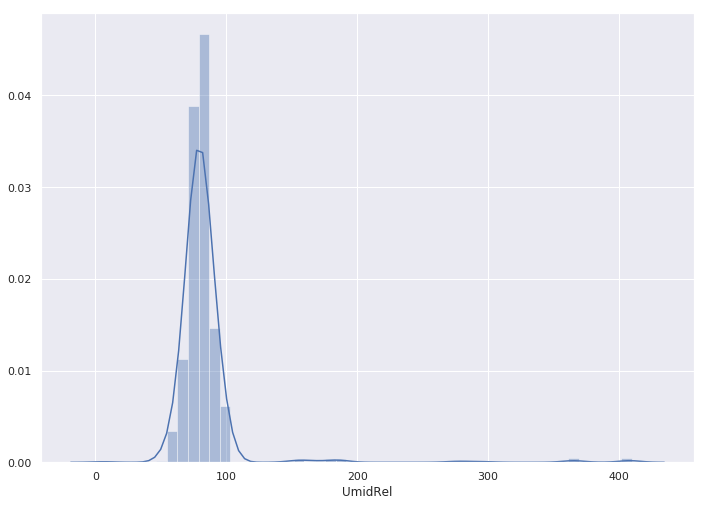

In [0]:
sns.distplot(dados.UmidRel)

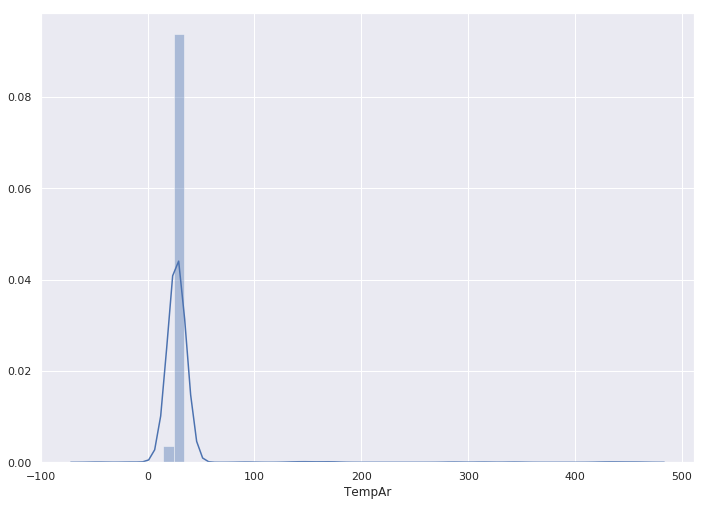

In [0]:
sns.distplot(dados.TempAr)